#### Applying the Naïve Bayes Algorithm

In [1]:
from ucimlrepo import fetch_ucirepo

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
#warnings.filterwarnings('ignore')

In [3]:
fertility_data = fetch_ucirepo(id=244)

In [4]:
X = pd.DataFrame(fertility_data.data.features)
Y = pd.DataFrame(fertility_data.data.targets)

In [5]:
X

,season,age,child_diseases,accident,surgical_intervention,high_fevers,alcohol,smoking,hrs_sitting
0,-0.33,0.69,0,1,1,0,0.8,0,0.88
1,-0.33,0.94,1,0,1,0,0.8,1,0.31
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50
...,...,...,...,...,...,...,...,...,...
95,-1.00,0.67,1,0,0,0,1.0,-1,0.50
96,-1.00,0.61,1,0,0,0,0.8,0,0.50
97,-1.00,0.67,1,1,1,0,1.0,-1,0.31
98,-1.00,0.64,1,0,1,0,1.0,0,0.19


In [6]:
Y.head()

,diagnosis
0,N
1,O
2,N
3,N
4,O


In [7]:
full_df = pd.concat([X,Y],axis=1)
full_df.head()

,season,age,child_diseases,accident,surgical_intervention,high_fevers,alcohol,smoking,hrs_sitting,diagnosis
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O


In [8]:
##we see that the diagnosis is still at categorical
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   season                 100 non-null    float64
 1   age                    100 non-null    float64
 2   child_diseases         100 non-null    int64  
 3   accident               100 non-null    int64  
 4   surgical_intervention  100 non-null    int64  
 5   high_fevers            100 non-null    int64  
 6   alcohol                100 non-null    float64
 7   smoking                100 non-null    int64  
 8   hrs_sitting            100 non-null    float64
 9   diagnosis              100 non-null    object 
dtypes: float64(4), int64(5), object(1)
memory usage: 7.9+ KB


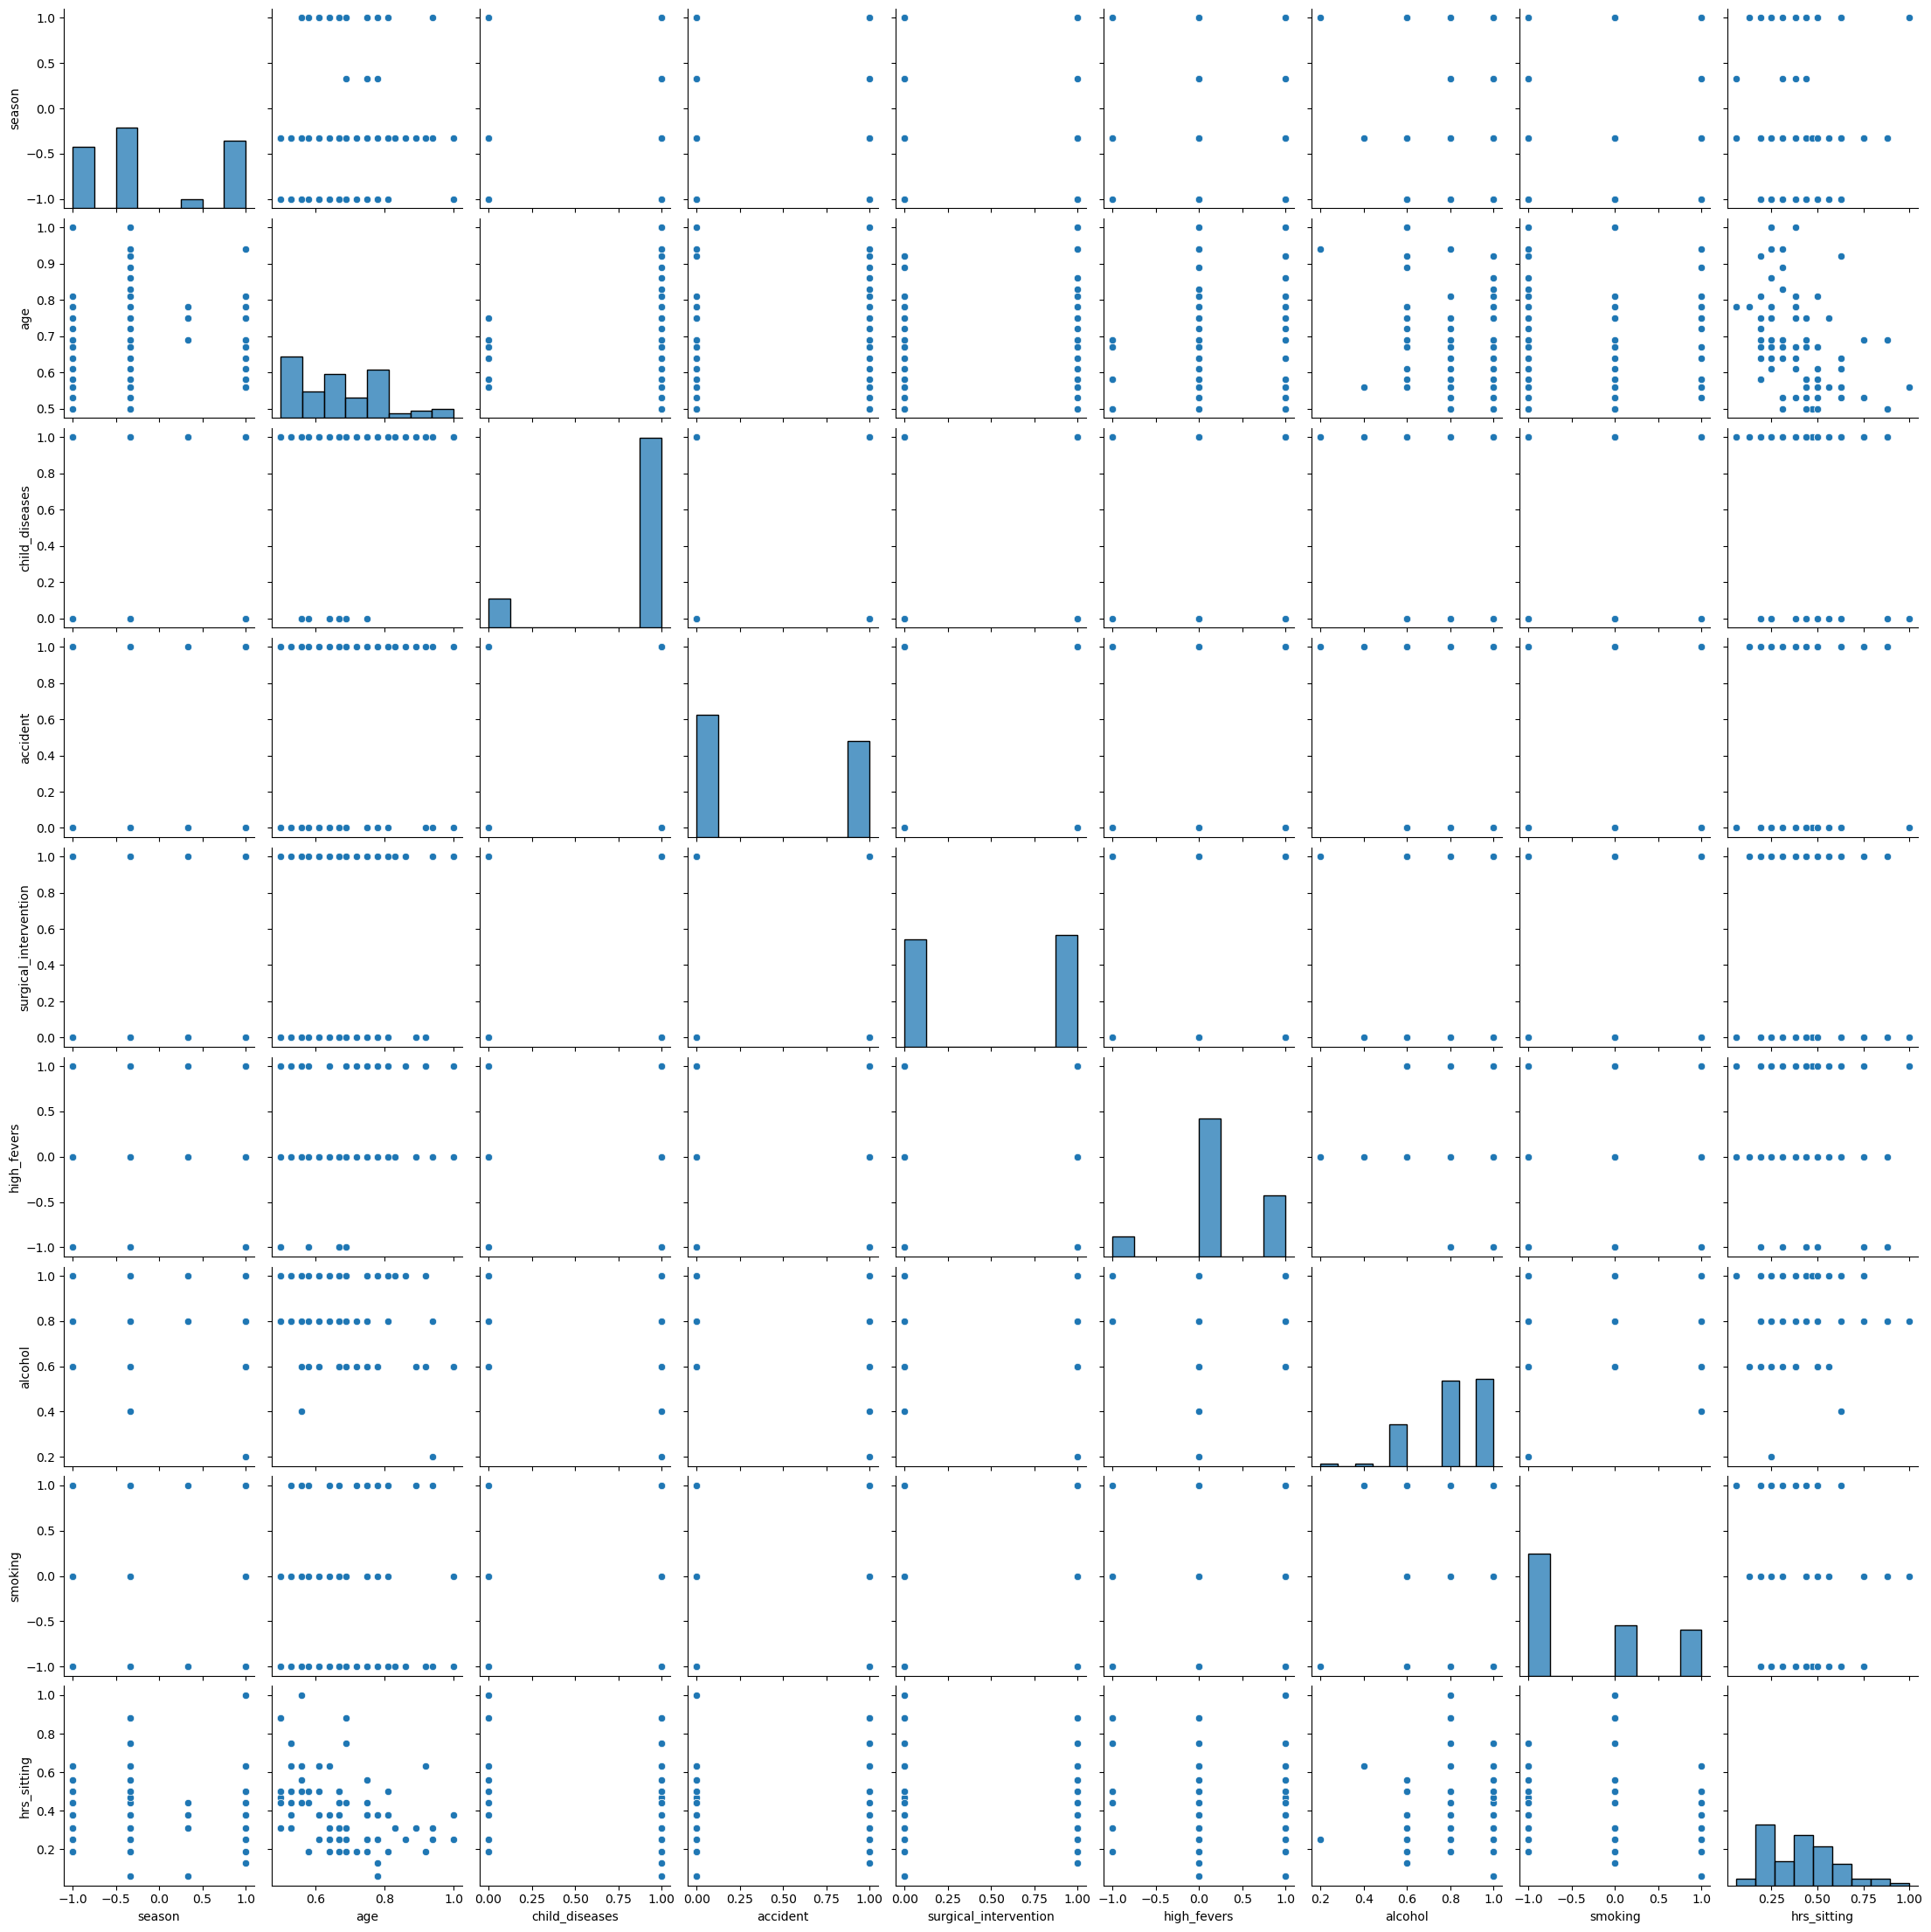

In [9]:
##no null variables/values
## checking spread mof the data
sns.pairplot(full_df)

<Axes: >

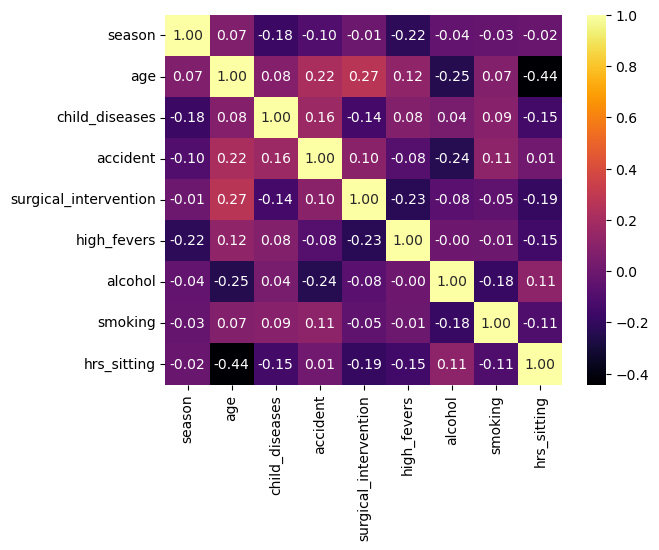

In [10]:
###full scope of numerical data
sns.heatmap(full_df.corr(numeric_only=True),annot=True, fmt='.2f',cmap='inferno')

In [11]:
##outliers in the data
num_vars = full_df.select_dtypes(include=np.number).columns
num_vars

Index(['season', 'age', 'child_diseases', 'accident', 'surgical_intervention',
       'high_fevers', 'alcohol', 'smoking', 'hrs_sitting'],
      dtype='object')

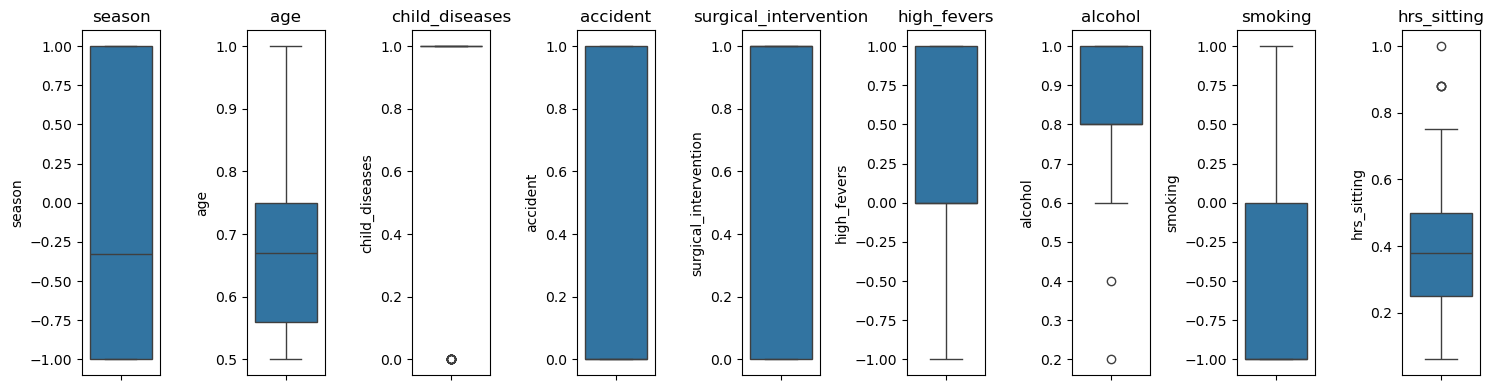

In [12]:
###visualizing outlier
plt.subplots(1,len(num_vars),figsize=(15,4))
for i, var in enumerate(num_vars,start=1):
    plt.subplot(1,len(num_vars),i)
    sns.boxplot(full_df[var])
    plt.title(f'{var}')
    plt.tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()

In [13]:
outliers = {}
for var in num_vars:
    min_val = full_df[var].mean()-(3*full_df[var].std())
    max_val = full_df[var].mean()+(3*full_df[var].std())
    min_val_count = (full_df[var]<=min_val).sum()
    max_val_count = (full_df[var]>max_val).sum()
    outliers[var] = [min_val_count,max_val_count,(min_val_count+max_val_count)/len(full_df[var])]

In [14]:
outliers

{'season': [0, 0, 0.0],
 'age': [0, 0, 0.0],
 'child_diseases': [0, 0, 0.0],
 'accident': [0, 0, 0.0],
 'surgical_intervention': [0, 0, 0.0],
 'high_fevers': [0, 0, 0.0],
 'alcohol': [1, 0, 0.01],
 'smoking': [0, 0, 0.0],
 'hrs_sitting': [0, 1, 0.01]}

In [15]:
##very minimal below 5% otuliers in the data

In [16]:
from sklearn.naive_bayes import GaussianNB

In [17]:
model = GaussianNB()
model = model.fit(X,Y)

C:\Users\LENOVO\Documents\anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:
pred = model.predict([[-0.33,0.69,0,1,1,0,0.8,0,0.88]])
print(pred)

['N']


C:\Users\LENOVO\Documents\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


### Applying the Decision Tree Algorithm

In [19]:
from sklearn import tree

In [20]:
model_t = tree.DecisionTreeClassifier()
model_t.fit(X,Y)

DecisionTreeClassifier()

In [21]:
help(model_t)

Help on DecisionTreeClassifier in module sklearn.tree._classes object:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0, monotonic_cst=None)
 |
 |  A decision tree classifier.
 |
 |  Read more in the :ref:`User Guide <tree>`.
 |
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy", "log_loss"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "log_loss" and "entropy" both for the
 |      Shannon information gain, see :ref:`tree_mathematical_formulation`.
 |
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies a

In [22]:
from sklearn.model_selection import cross_val_score

In [23]:
score = cross_val_score(model,X,Y, cv=10,scoring='accuracy')
score

C:\Users\LENOVO\Documents\anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\LENOVO\Documents\anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\LENOVO\Documents\anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\LENOVO\Documents\anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

array([0.6, 0.7, 0.8, 0.9, 0.9, 0.7, 0.9, 0.9, 0.8, 0.8])

In [24]:
print(score.mean(),score.std())

0.8 0.10000000000000002


In [25]:
score = cross_val_score(model_t,X,Y, cv=10,scoring='accuracy')
print(score.mean(),score.std())

0.71 0.2211334438749598


In [26]:
importances = model_t.feature_importances_
features  = X.columns

In [27]:
indices = importances.argsort()[::-1]
print(importances)
print(indices)
top_features = X.columns[indices]
print(top_features)

[0.1534731  0.29216168 0.04970179 0.11304078 0.04261786 0.06626905
 0.11265739 0.04544164 0.12463671]
[1 0 8 3 6 5 2 7 4]
Index(['age', 'season', 'hrs_sitting', 'accident', 'alcohol', 'high_fevers',
       'child_diseases', 'smoking', 'surgical_intervention'],
      dtype='object')


In [28]:
pd.DataFrame(list(zip(features,importances*100)), columns=['features','importance']).sort_values(by='importance', ascending=False)

,features,importance
1,age,29.216168
0,season,15.347310
8,hrs_sitting,12.463671
3,accident,11.304078
6,alcohol,11.265739
5,high_fevers,6.626905
2,child_diseases,4.970179
7,smoking,4.544164
4,surgical_intervention,4.261786


In [29]:
model.predict([[0.33,0.69,0,1,1,0,0.8,0,0.88]])

C:\Users\LENOVO\Documents\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array(['N'], dtype='<U1')

In [30]:
from sklearn.decomposition import PCA
pca = PCA(n_components=len(X.columns)).fit(X)

In [31]:
pca.explained_variance_ratio_

array([0.29811688, 0.27831812, 0.15740594, 0.10093607, 0.09250314,
       0.04442102, 0.01415956, 0.01020069, 0.00393857])

In [32]:
ds = pd.DataFrame(list(zip(range(1,len(pca.explained_variance_ratio_)+1),
                      pca.explained_variance_ratio_)), columns=['components','explained_info'],index=X.columns)       
ds

,components,explained_info
season,1,0.298117
age,2,0.278318
child_diseases,3,0.157406
accident,4,0.100936
surgical_intervention,5,0.092503
high_fevers,6,0.044421
alcohol,7,0.014160
smoking,8,0.010201
hrs_sitting,9,0.003939


In [33]:
cumu_var = np.cumsum(pca.explained_variance_ratio_)
cumu_var

array([0.29811688, 0.57643501, 0.73384095, 0.83477702, 0.92728016,
       0.97170118, 0.98586074, 0.99606143, 1.        ])

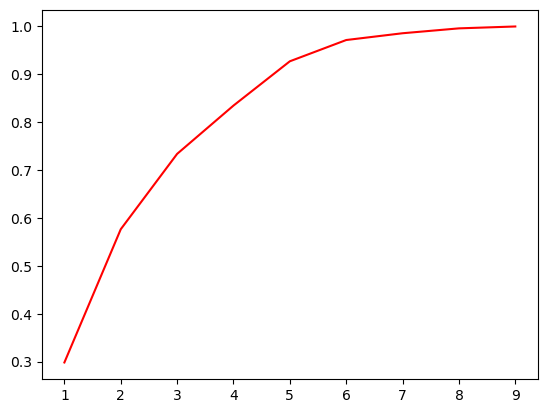

In [34]:
plt.plot(range(1,len(cumu_var)+1), cumu_var,'r-')
plt.show()

In [35]:
pd.DataFrame(pca.components_,columns=[f'PC{i+1}' for i in range(len(pca.components_))]).corr()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
PC1,1.000000,0.023343,-0.012977,0.076121,-0.014688,-0.031195,-0.021556,0.053178,0.088594
PC2,0.023343,1.000000,0.021774,-0.127724,0.024645,0.052342,0.036169,-0.089227,-0.148651
PC3,-0.012977,0.021774,1.000000,0.071006,-0.013701,-0.029099,-0.020108,0.049604,0.082640
PC4,0.076121,-0.127724,0.071006,1.000000,0.080368,0.170688,0.117949,-0.290972,-0.484757
PC5,-0.014688,0.024645,-0.013701,0.080368,1.000000,-0.032935,-0.022759,0.056145,0.093536
PC6,-0.031195,0.052342,-0.029099,0.170688,-0.032935,1.000000,-0.048336,0.119241,0.198655
PC7,-0.021556,0.036169,-0.020108,0.117949,-0.022759,-0.048336,1.000000,0.082398,0.137275
PC8,0.053178,-0.089227,0.049604,-0.290972,0.056145,0.119241,0.082398,1.000000,-0.338646
PC9,0.088594,-0.148651,0.082640,-0.484757,0.093536,0.198655,0.137275,-0.338646,1.000000


In [36]:
new = PCA(n_components=6,random_state=101).fit(X)

In [37]:
new.components_

array([[-0.74866747,  0.00385713,  0.10131467,  0.11743672, -0.05680195,
         0.21902725, -0.01940658,  0.6029679 , -0.016727  ],
       [ 0.57990728,  0.01321964, -0.01813739,  0.04509925, -0.00597245,
        -0.20388052, -0.03873019,  0.78597346, -0.01768152],
       [-0.23382141,  0.01499631, -0.01761934,  0.33588772,  0.53635369,
        -0.73643432, -0.02396971, -0.03528191,  0.01189558],
       [ 0.18408497,  0.07225383,  0.16043657,  0.89584911, -0.02262151,
         0.33836731, -0.08070634, -0.1017275 , -0.02721059],
       [-0.09097558, -0.08762957,  0.17712572,  0.15880287, -0.81364194,
        -0.49295867,  0.02924834, -0.06609044,  0.13117835],
       [-0.06706042, -0.05371737, -0.9516642 ,  0.17983075, -0.14789238,
         0.02068752, -0.05521505,  0.02343624,  0.16945619]])

In [38]:
new.explained_variance_ratio_

array([0.29811688, 0.27831812, 0.15740594, 0.10093607, 0.09250314,
       0.04442102])

In [39]:
cumvar = np.cumsum(new.explained_variance_ratio_)
cumvar

array([0.29811688, 0.57643501, 0.73384095, 0.83477702, 0.92728016,
       0.97170118])

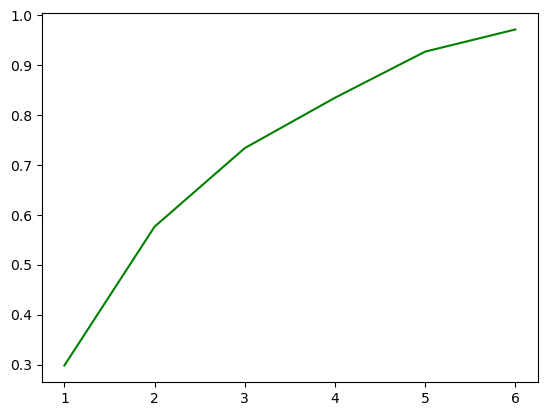

In [40]:
plt.plot(range(1,len(cumvar)+1), cumvar,'g-')
plt.show()

### Applying the SVM Algorithm

In [41]:
from sklearn.svm import SVC

In [42]:
model_s = SVC().fit(X,Y)
model_s

C:\Users\LENOVO\Documents\anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [43]:
help(model_s)

Help on SVC in module sklearn.svm._classes object:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |
 |  C-Support Vector Classification.
 |
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer or
 |  other :ref:`kernel_approximation`.
 |
 |  The multiclass support is handled according to a one-vs-one scheme.
 |
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, 

In [44]:
print(model_s.classes_,'\n',model_s.class_weight_)

['N' 'O'] 
 [1. 1.]


In [45]:
pred = model_s.predict([[-0.33,0.69,0,1,1,0,0.8,0,0.88]])
pred

C:\Users\LENOVO\Documents\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array(['N'], dtype=object)

### ARTIFICIAL NEURAL NETWORK

In [46]:
from sklearn.neural_network import MLPClassifier

In [47]:
full_df

,season,age,child_diseases,accident,surgical_intervention,high_fevers,alcohol,smoking,hrs_sitting,diagnosis
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O
...,...,...,...,...,...,...,...,...,...,...
95,-1.00,0.67,1,0,0,0,1.0,-1,0.50,N
96,-1.00,0.61,1,0,0,0,0.8,0,0.50,N
97,-1.00,0.67,1,1,1,0,1.0,-1,0.31,N
98,-1.00,0.64,1,0,1,0,1.0,0,0.19,N


In [67]:
from sklearn.utils import column_or_1d
Y = column_or_1d(Y,warn=True)


In [65]:
Y.reshape(-1,1)

array([['N'],
       ['O'],
       ['N'],
       ['N'],
       ['O'],
       ['N'],
       ['N'],
       ['N'],
       ['N'],
       ['N'],
       ['N'],
       ['N'],
       ['N'],
       ['N'],
       ['N'],
       ['N'],
       ['N'],
       ['O'],
       ['N'],
       ['O'],
       ['N'],
       ['N'],
       ['N'],
       ['O'],
       ['N'],
       ['N'],
       ['O'],
       ['O'],
       ['N'],
       ['O'],
       ['N'],
       ['N'],
       ['N'],
       ['N'],
       ['N'],
       ['N'],
       ['N'],
       ['N'],
       ['O'],
       ['N'],
       ['N'],
       ['N'],
       ['N'],
       ['N'],
       ['N'],
       ['N'],
       ['N'],
       ['N'],
       ['N'],
       ['N'],
       ['N'],
       ['N'],
       ['N'],
       ['N'],
       ['N'],
       ['N'],
       ['N'],
       ['N'],
       ['N'],
       ['N'],
       ['N'],
       ['N'],
       ['N'],
       ['N'],
       ['N'],
       ['N'],
       ['N'],
       ['N'],
       ['N'],
       ['N'],
       ['O'],
      

In [66]:
model_n = MLPClassifier(random_state=101)
model_n.fit(X,Y)

C:\Users\LENOVO\Documents\anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=101)

In [68]:
model_n = MLPClassifier(max_iter=1200,random_state=101)
model_n.fit(X,Y)

MLPClassifier(max_iter=1200, random_state=101)

In [69]:
pred = model_n.predict([[-0.33,0.69,0,1,1,0,0.8,0,0.88]])
pred

C:\Users\LENOVO\Documents\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


array(['N'], dtype='<U1')

In [73]:
from sklearn import metrics
pred = model_n.predict(X)
acc = metrics.accuracy_score(Y,pred)
acc

0.98

In [74]:
help(model_n)

Help on MLPClassifier in module sklearn.neural_network._multilayer_perceptron object:

class MLPClassifier(sklearn.base.ClassifierMixin, BaseMultilayerPerceptron)
 |  MLPClassifier(hidden_layer_sizes=(100,), activation='relu', *, solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)
 |
 |  Multi-layer Perceptron classifier.
 |
 |  This model optimizes the log-loss function using LBFGS or stochastic
 |  gradient descent.
 |
 |  .. versionadded:: 0.18
 |
 |  Parameters
 |  ----------
 |  hidden_layer_sizes : array-like of shape(n_layers - 2,), default=(100,)
 |      The ith element represents the number of neurons in the ith
 |      hidden layer.
 |
 |  activation : {'identity', 